<a href="https://colab.research.google.com/github/Arohi22017/Machine_learning_projects/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [ ]:
dataframe=pd.DataFrame(data)

In [ ]:
dataframe.head

<bound method NDFrame.head of           0     1      2    3      4      5     6       7    8      9     10  \
0    0.00632  18.0   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1    0.02731   0.0   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2    0.02729   0.0   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3    0.03237   0.0   2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4    0.06905   0.0   2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   
..       ...   ...    ...  ...    ...    ...   ...     ...  ...    ...   ...   
501  0.06263   0.0  11.93  0.0  0.573  6.593  69.1  2.4786  1.0  273.0  21.0   
502  0.04527   0.0  11.93  0.0  0.573  6.120  76.7  2.2875  1.0  273.0  21.0   
503  0.06076   0.0  11.93  0.0  0.573  6.976  91.0  2.1675  1.0  273.0  21.0   
504  0.10959   0.0  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0  21.0   
505  0.04741   0.0  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0  21.0   

         

In [ ]:
dataframe['target']=target

In [ ]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
dataframe.shape

(506, 14)

In [ ]:
dataframe.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
target    0
dtype: int64

In [ ]:
correlation=dataframe.corr()

<Axes: >

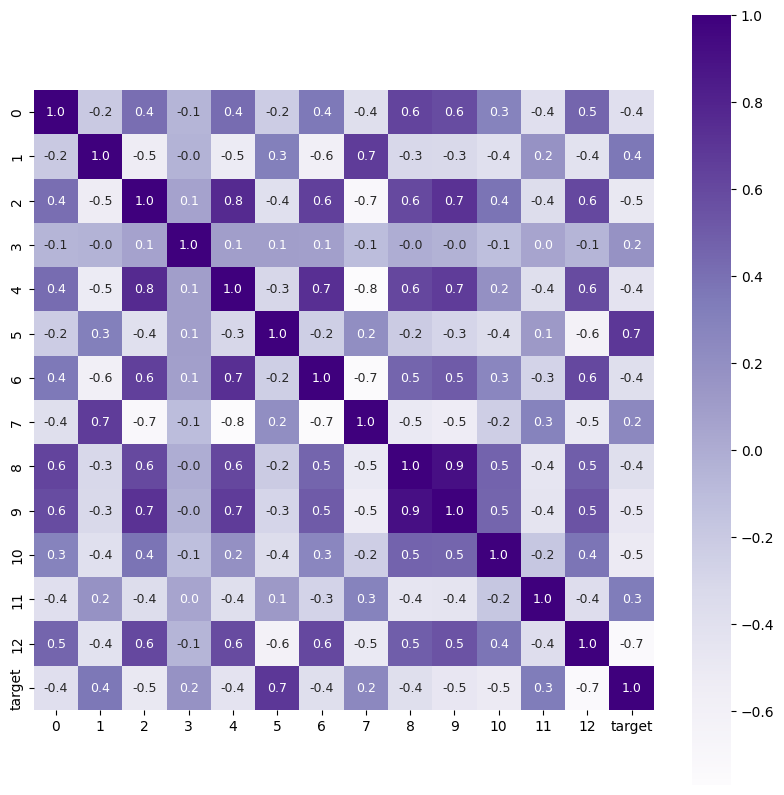

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':9},cmap='Purples')
#cbar=color bar represented on the right side
#fmt=no. of value after decimal point in float
#

In [ ]:
X=dataframe.drop(['target'],axis=1)
Y=dataframe['target']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
model=XGBRegressor()

In [ ]:
print(X_train.shape,Y_train.shape)
print(Y)

(404, 13) (404,)
0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64


In [ ]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
Y_pred=model.predict(X_train)

In [ ]:
#accuracy of model

score=metrics.r2_score(Y_train,Y_pred)
score2=metrics.mean_absolute_error(Y_train,Y_pred)

In [ ]:
print(score)
print(score2)

0.9999952977725205
0.01375658535721277


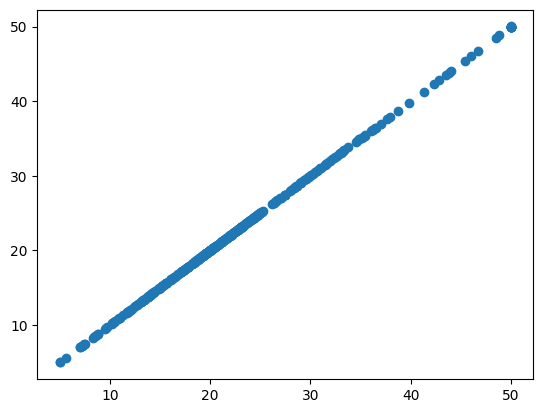

In [ ]:
plt.scatter(Y_train,Y_pred)
plt.show()

In [ ]:
model.fit(X_test,Y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
Y_pred_test=model.predict(X_test)

In [ ]:
test_score=metrics.r2_score(Y_test,Y_pred_test)
test_score2=metrics.mean_absolute_error(Y_test,Y_pred_test)

In [ ]:
print(test_score)
print(test_score2)

0.9999999916184048
0.0006142373178520726


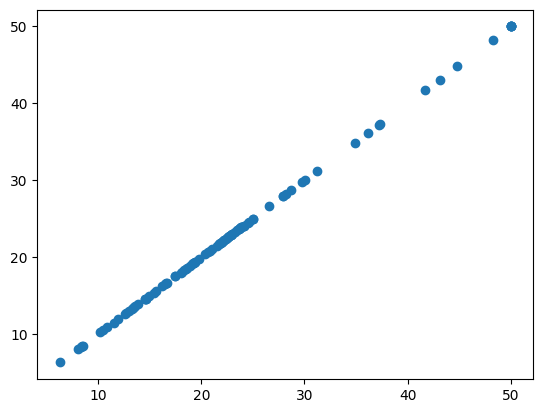

In [ ]:
plt.scatter(Y_test,Y_pred_test)
plt.show()